In [ ]:
#Importing the libraries
# !pip install nsepy
# from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Setting start and end dates and fetching the historical data
start = dt.datetime(2013,1,1)
end = dt.datetime.now()
stk_data = gh(symbol='SBIN',start=start,end=end)

In [ ]:
#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
1422/1422 [==============================] - 16s 11ms/step - loss: 0.0226
Epoch 2/10
1422/1422 [==============================] - 13s 9ms/step - loss: 0.0081
Epoch 3/10
1422/1422 [==============================] - 14s 10ms/step - loss: 0.0071
Epoch 4/10
1422/1422 [==============================] - 12s 8ms/step - loss: 0.0063
Epoch 5/10
1422/1422 [==============================] - 12s 8ms/step - loss: 0.0058
Epoch 6/10
1422/1422 [==============================] - 13s 9ms/step - loss: 0.0058
Epoch 7/10
1422/1422 [==============================] - 14s 10ms/step - loss: 0.0054
Epoch 8/10
1422/1422 [==============================] - 13s 9ms/step - loss: 0.0051
Epoch 9/10
1422/1422 [==============================] - 14s 10ms/step - loss: 0.0048
Epoch 10/10
1422/1422 [==============================] - 13s 9ms/step - loss: 0.0051


In [ ]:
#Fetching the test data and preprocessing
current = dt.datetime.now()
# print(current.day, curr)
# testdataframe = gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe = gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime.now())
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
print(len(inputs))
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(len(X_test))

596
175


In [ ]:
#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
regressor.save(r"C:\Users\Naman Shah\Desktop\Sem 7 20-21\mini project\model.h5")

# regressor.save_weights(r"C:\Users\Naman Shah\Desktop\Sem 7 20-21\mini project\model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
reconstructed_model = keras.models.load_model(r"C:\Users\Naman Shah\Desktop\Sem 7 20-21\mini project\model.h5")
print(X_test[0])
# print(reconstructed_model.predict(X_test))


[[0.0343672 ]
 [0.03470588]
 [0.03745098]
 [0.03987522]
 [0.04242424]
 [0.04283422]
 [0.04172906]
 [0.04210339]
 [0.04351159]
 [0.04352941]
 [0.04308378]
 [0.04208556]
 [0.0412656 ]
 [0.04153298]
 [0.03666667]
 [0.03743316]
 [0.04030303]
 [0.04163993]
 [0.04433155]
 [0.04493761]
 [0.04386809]
 [0.04383244]
 [0.04631016]
 [0.04495544]
 [0.04672014]
 [0.04885918]
 [0.04925134]
 [0.04850267]
 [0.04565062]
 [0.05135472]
 [0.05516934]
 [0.05520499]
 [0.05402852]
 [0.05194296]
 [0.05235294]
 [0.05420677]
 [0.05117647]
 [0.0472549 ]
 [0.04572193]
 [0.04276292]
 [0.04764706]
 [0.04746881]
 [0.05812834]
 [0.06481283]
 [0.06504456]
 [0.08379679]
 [0.08771836]
 [0.08727273]
 [0.08631016]
 [0.08550802]
 [0.08522282]
 [0.08754011]
 [0.09270945]
 [0.08950089]
 [0.09736185]
 [0.09377897]
 [0.08864528]
 [0.08557932]
 [0.08736185]
 [0.09235294]]


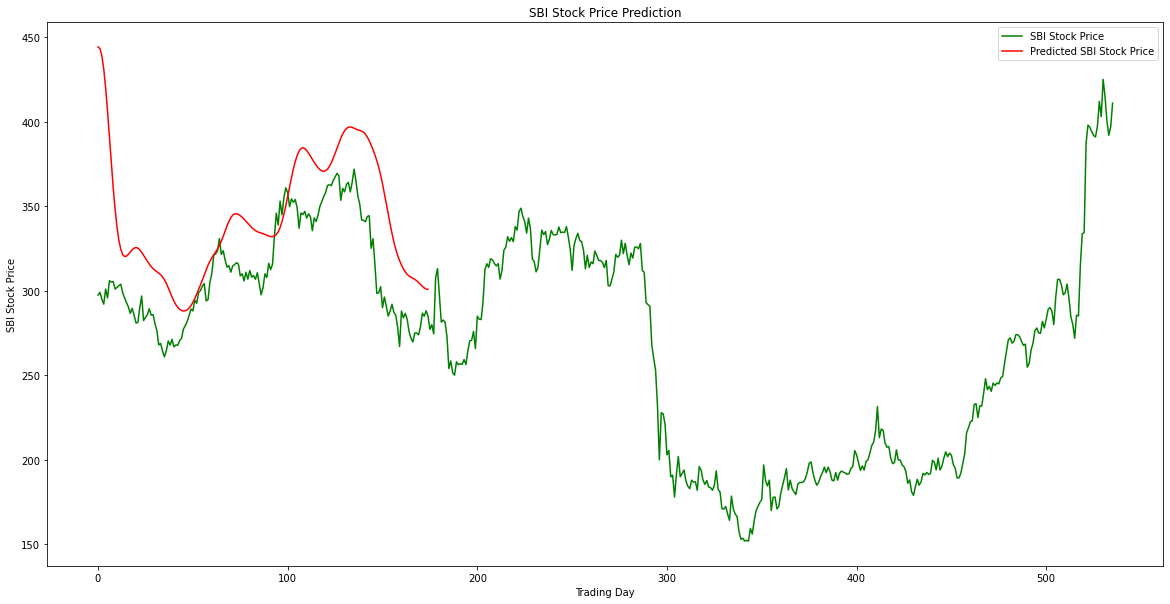

In [ ]:
#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sbi_data.csv',usecols = ['Date','Close'])
df

,Date,Close
0,2013-01-01,832.95
1,2013-01-02,846.60
2,2013-01-03,845.50
3,2013-01-04,837.70
4,2013-01-07,822.95
...,...,...
2014,2021-02-19,2741.30
2015,2021-02-22,2651.95
2016,2021-02-23,2628.60
2017,2021-02-24,2707.75


In [ ]:
df1 = df.reset_index()['Close']

In [ ]:
df1

0        832.95
1        846.60
2        845.50
3        837.70
4        822.95
         ...   
2014    2741.30
2015    2651.95
2016    2628.60
2017    2707.75
2018    2684.70
Name: Close, Length: 2019, dtype: float64

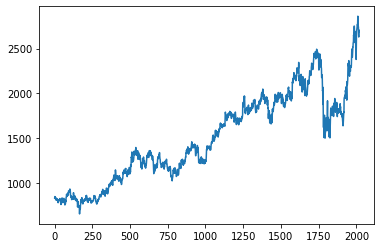

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.08162341],
       [0.08780631],
       [0.08730806],
       ...,
       [0.8949812 ],
       [0.93083299],
       [0.92039226]])

In [ ]:
# Splitting the dataset into 65% train
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(1312, 707)

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.08162341 0.08780631 0.08730806 ... 0.11192644 0.11342121 0.11473479]
 [0.08780631 0.08730806 0.08377497 ... 0.11342121 0.11473479 0.12535671]
 [0.08730806 0.08377497 0.07709381 ... 0.11473479 0.12535671 0.12096299]
 ...
 [0.46947049 0.47187118 0.48258368 ... 0.53281696 0.53804865 0.55156951]
 [0.47187118 0.48258368 0.47644608 ... 0.53804865 0.55156951 0.56028899]
 [0.48258368 0.47644608 0.47936767 ... 0.55156951 0.56028899 0.55485347]]


In [ ]:
X_test.shape, ytest.shape

((606, 100), (606,))

In [ ]:
X_train.shape, y_train.shape

((1211, 100), (1211,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


X_train[:100]

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=100, batch_size=64, verbose=1)

Making a time series forecasting with the Help of ARIMA Model. 

more about ARIMA Model can be found out at: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/


ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 2.1MB 24.7MB/s 
     |████████████████████████████████| 9.5MB 41.9MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [ ]:
df = pd.read_csv('/content/hdfc_data.csv')
df = df[['Date', 'Close']]
df.index = df['Date']
df.index = pd.to_datetime(df.index)
df.drop(['Date'], axis=1)

,Close
Date,
2013-01-01,832.95
2013-01-02,846.60
2013-01-03,845.50
2013-01-04,837.70
2013-01-07,822.95
...,...
2021-02-24,2707.75
2021-02-25,2684.70
2021-02-26,2539.40


In [ ]:

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
	dftest = adfuller(dataset, autolag='AIC')
	print("1. ADF ", dftest[0])
	print("2. P value: ", dftest[1])
	print("3. Num of Lags : ", dftest[2])
	print("4. Num of obs used for adf regression and critical values Calculation: ", dftest[3])
	print("5. Critical Values: ", dftest[4])

	for key, val in dftest[4].items():
		print("\t", key, " : ", val)



ad_test(df.Close)



1. ADF  -0.6315894243311091
2. P value:  0.8636831759996213
3. Num of Lags :  12
4. Num of obs used for adf regression and critical values Calculation:  2009
5. Critical Values:  {'1%': -3.4336091712699957, '5%': -2.862979729933645, '10%': -2.567536450078678}
	 1%  :  -3.4336091712699957
	 5%  :  -2.862979729933645
	 10%  :  -2.567536450078678


In [ ]:

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


stepwise_fir = auto_arima(df.Close, trace=True, supress_warnings=True, start_p = 4)
stepwise_fir.summary()


Performing stepwise search to minimize aic
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=19441.858, Time=5.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19485.433, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19487.410, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19487.407, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19485.081, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19461.355, Time=4.83 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=19464.447, Time=3.32 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=19439.705, Time=6.46 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=19456.306, Time=3.64 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=19442.169, Time=7.34 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.43 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=19439.048, Time=2.97 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=19441.175, Time=2.25 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=19456.307, Time=1.16 sec
 ARIMA(5,1,3)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2022
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -9711.524
Date:                Wed, 03 Mar 2021   AIC                          19439.048
Time:                        17:01:20   BIC                          19483.939
Sample:                             0   HQIC                         19455.522
                               - 2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4584      0.034    -42.955      0.000      -1.525      -1.392
ar.L2         -0.8828      0.038    -23.456      0.000      -0.957      -0.809
ar.L3         -0.1613      0.025     -6.326      0.000      -0.211      -0.111
ar.L4         -0.2032      0.021     -9.587      0.000      -0.245      -0.162
ar.L5         -0.0580      0.014     -4.076      0.000      -0.086      -0.030
ma.L1          1.4712      0.031     46.964      0.000       1.410       1.533
ma.L2          0.8391      0.028     30.112      0.000       0.784       0.894
sigma2       873.6100     13.373     65.326      0.000     847.399     899.821
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6175.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.31   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:



from statsmodels.tsa.arima_model import ARIMA


print(df.shape)
train=df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)
model = ARIMA(train.Close, order=(5,1,2))
model = model.fit()
print(model.summary())


(2022, 2)
(1992, 2) (30, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1991
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9501.212
Method:                       css-mle   S.D. of innovations             28.591
Date:                Wed, 03 Mar 2021   AIC                          19020.425
Time:                        17:01:22   BIC                          19070.792
Sample:                             1   HQIC                         19038.923
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8774      0.557      1.576      0.115      -0.214       1.968
ar.L1.D.Close    -1.4443      0.077    -18.874      0.000      -1.594      -1.294
ar.L2.D.Clos

                  Date    Close
Date                           
2021-01-19  2021-01-19  2656.95
2021-01-20  2021-01-20  2688.15
2021-01-21  2021-01-21  2663.00
2021-01-22  2021-01-22  2589.45
2021-01-25  2021-01-25  2551.40
2021-01-27  2021-01-27  2467.00
2021-01-28  2021-01-28  2425.75
2021-01-29  2021-01-29  2377.80
2021-02-01  2021-02-01  2579.25
2021-02-02  2021-02-02  2659.00
2021-02-03  2021-02-03  2703.55
2021-02-04  2021-02-04  2707.75
2021-02-05  2021-02-05  2721.50
2021-02-08  2021-02-08  2733.35
2021-02-09  2021-02-09  2747.05
2021-02-10  2021-02-10  2767.10
2021-02-11  2021-02-11  2760.60
2021-02-12  2021-02-12  2791.50
2021-02-15  2021-02-15  2860.45
2021-02-16  2021-02-16  2858.65
2021-02-17  2021-02-17  2805.35
2021-02-18  2021-02-18  2745.15
2021-02-19  2021-02-19  2741.30
2021-02-22  2021-02-22  2651.95
2021-02-23  2021-02-23  2628.60
2021-02-24  2021-02-24  2707.75
2021-02-25  2021-02-25  2684.70
2021-02-26  2021-02-26  2539.40
2021-03-01  2021-03-01  2606.00
2021-03-

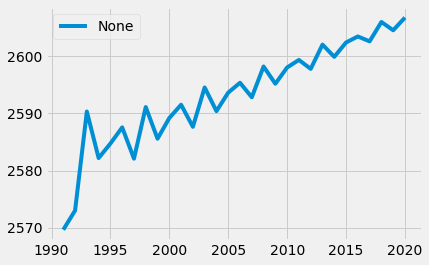

In [ ]:

start = len(train)
end = len(train)+ len(test) -1
pred = model.predict(start=start, end=end, typ="levels")
# print(pred)
# pred.index = df.index[start:end+1]
pred.plot(legend=True)
print(test)
# test['Close'].plot()
# plt.show()


In [ ]:

print(test.Close.mean())
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred, test.Close))
print("The rmse is ", rmse)


2666.1149999999993
The rmse is  135.13436449388334


In [ ]:

print(type(df.Close))
model2 = ARIMA(df.Close, order=(5,1,2))
model2 = model2.fit()
print(df.tail())



<class 'pandas.core.series.Series'>
                  Date    Close
Date                           
2021-02-24  2021-02-24  2707.75
2021-02-25  2021-02-25  2684.70
2021-02-26  2021-02-26  2539.40
2021-03-01  2021-03-01  2606.00
2021-03-02  2021-03-02  2564.00


DatetimeIndex(['2021-03-03 17:02:06.795622', '2021-03-04 17:02:06.795622',
               '2021-03-05 17:02:06.795622', '2021-03-06 17:02:06.795622',
               '2021-03-07 17:02:06.795622', '2021-03-08 17:02:06.795622',
               '2021-03-09 17:02:06.795622', '2021-03-10 17:02:06.795622',
               '2021-03-11 17:02:06.795622', '2021-03-12 17:02:06.795622',
               '2021-03-13 17:02:06.795622'],
              dtype='datetime64[ns]', freq='D')


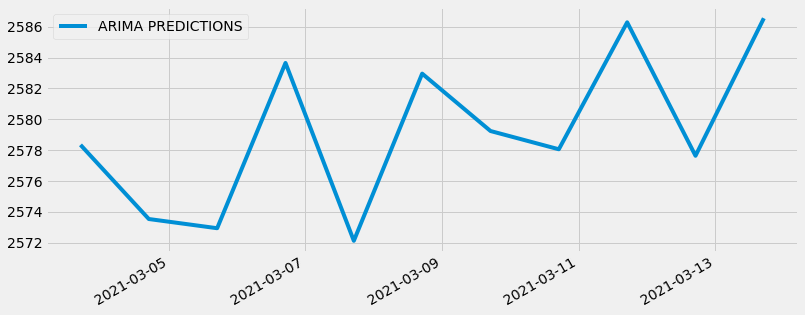

In [ ]:


import datetime as dt
# Future dates
index_future_dates = pd.date_range(start = dt.datetime.now() , end=dt.datetime.now() + dt.timedelta(days=10))

print(index_future_dates)
pred = model2.predict(start=len(df), end=len(df)+10, typ='levels').rename('ARIMA PREDICTIONS')

pred.index = index_future_dates
pred.plot(figsize=(12,5), legend =True)


In [ ]:
model2.save('model_22.pkl')

In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults

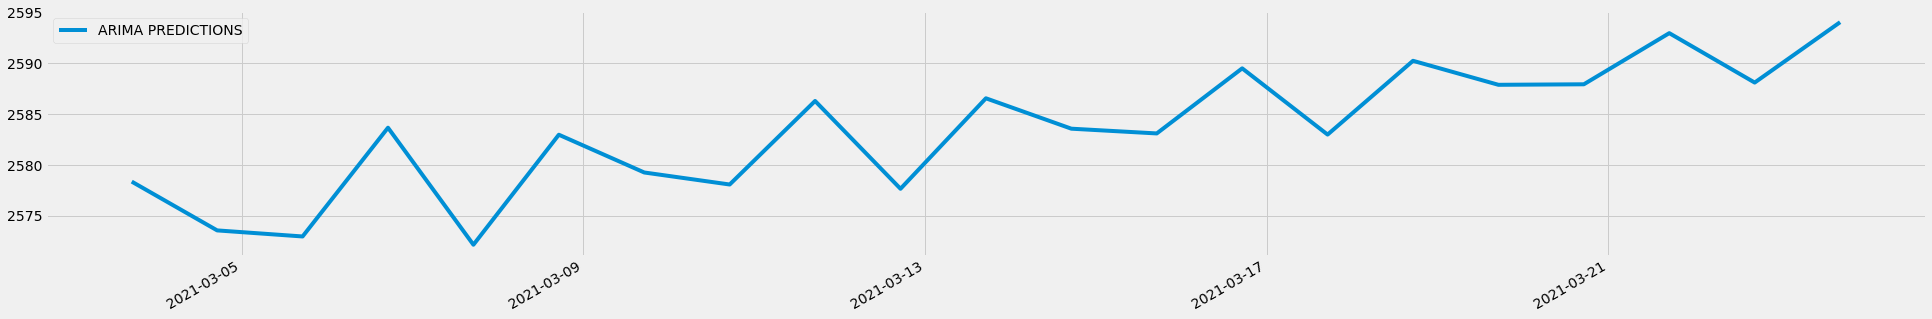

In [ ]:
loaded = ARIMAResults.load('model_22.pkl')
index_future_dates = pd.date_range(start = dt.datetime.now() , end=dt.datetime.now() + dt.timedelta(days=20))

pred = loaded.predict(start=len(df), end=len(df)+20, typ='levels').rename('ARIMA PREDICTIONS')

pred.index = index_future_dates
pred.plot(figsize=(30,5), legend =True)